# Defining alignment targets
Example of how to define alignment targets.

## Set up for analysis
Import necessary Python modules:

In [1]:
import tempfile

import Bio.SeqIO

from alignparse.targets import Target, Targets

## A single target
First we show how to define a single `Target`, using an example an amplicon for PacBio sequencing of RecA for a deep mutational scanning experiment.
The amplicon is defined in [Genbank Flat File format](https://www.ncbi.nlm.nih.gov/genbank/samplerecord/).
First, let's just look at that file:

In [2]:
recA_targetfile = "../notebooks/input_files/recA_amplicon.gb"

with open(recA_targetfile) as f:
    print(f.read())

LOCUS       RecA_PacBio_amplicon    1342 bp ds-DNA     linear       06-AUG-2018
DEFINITION  PacBio amplicon for deep mutational scanning of E. coli RecA.
ACCESSION   None
VERSION     
SOURCE      Danny Lawrence
  ORGANISM  .
COMMENT     PacBio amplicon for RecA libraries.
COMMENT     There are single nucleotide tags in the 5' and 3' termini to measure strand exchange.
FEATURES             Location/Qualifiers
     termini5        1..147
                     /label="termini 5' of gene"
     gene            148..1206
                     /label="RecA gene"
     spacer          1207..1285
                     /label="spacer between gene & barcode"
     barcode         1286..1303
                     /label="18 nucleotide barcode"
     termini3        1304..1342
                     /label="termini 3' of barcode"
     variant_tag5    33..33
                     /label="5' variant tag"
     variant_tag3    1311..1311
                     /label="3' variant tag"
ORIGIN
        1 gcacggcgtc ac

Read the Genbank file for the target into a BioPython SeqRecord:

In [3]:
recA_seqrecord = Bio.SeqIO.read(recA_targetfile, format="genbank")

Create a `Target` object:

In [4]:
target = Target(
    seqrecord=recA_seqrecord,
    req_features=[
        "termini5",
        "gene",
        "spacer",
        "barcode",
        "termini3",
        "variant_tag5",
        "variant_tag3",
    ],
)

We can get specific features out of the `Target` object.
Below we look for two features and print the one that exists:

In [5]:
for feature in ["non-existent", "termini5"]:
    if target.has_feature(feature):
        print(f"Here is feature {feature}:\n{target.get_feature(feature)}")
    else:
        print(f"target lacks feature {feature}\n")

target lacks feature non-existent

Here is feature termini5:
Feature(name=termini5, seq=GCACGGCGTCACACTTTGCTATGCCATAGCATRTTTATCCATAAGATTAGCGGATCCTACCTGACGCTTTTTATCGCAACTCTCTACTGTTTCTCCATAACAGAACATATTGACTATCCGGTATTACCCGGCATGACAGGAGTAAAA, start=0, end=147)


We can get a [dna_features_viewer](https://edinburgh-genome-foundry.github.io/DnaFeaturesViewer/) `GraphicRecord` with `Target.image`, and then plot this using its `.plot` method, which returns a `matplotlib.Axes` instance.
(Note that `Target.image` also provides options for setting colors, labels):

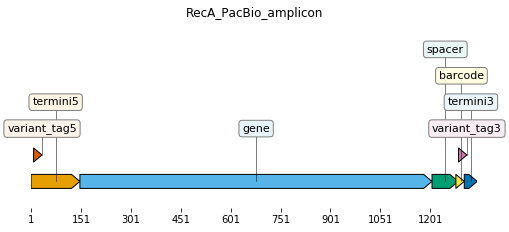

In [6]:
image = target.image()
ax, _ = image.plot()
_ = ax.set_title(target.name)

## Multiple targets
We can read multiple targets into a `Targets` object. Below is an example with the two LASV GP constructs - wildtype and codon optimized - from the Josiah strain.

First, let's look at these files:

In [7]:
target_file_names = ["LASV_Josiah_WT", "LASV_Josiah_OPT"]

targetfiles = [
    f"../notebooks/input_files/{target_file_name}.gb"
    for target_file_name in target_file_names
]

for targetfile in targetfiles:
    with open(targetfile) as f:
        print(f.read())

LOCUS       LASV_Josiah_WT          1730 bp ds-DNA     linear       14-JUN-2019
DEFINITION  .
ACCESSION   
VERSION     
SOURCE      Kate Crawford
  ORGANISM  .
COMMENT     PacBio amplicon for LASV Josiah WT sequence
FEATURES             Location/Qualifiers
     T2A             85..147
                     /label="T2A"
     WPRE            1639..1730
                     /label="WPRE"
     ZsGreen         15..84
                     /label="ZsGreen"
     termini3        1639..1730
                     /label="3'Termini"
     index           9..14
                     /label="index"
     leader5         1..8
                     /label="5' leader"
     termini5        1..147
                     /label="5'Termini"
     variant_tag5    34..34
                     /variant_1=T
                     /variant_2=C
                     /label="5'VariantTag"
     variant_tag3    1702..1702
                     /variant_1=G
                     /variant_2=A
                     /label="3'VariantT

Read the sequences into a `Targets`:

In [8]:
lasv_parse_specs_file = "../notebooks/input_files/lasv_feature_parse_specs.yaml"

lasv_targets = Targets(
    seqsfile=targetfiles,
    feature_parse_specs=lasv_parse_specs_file,
    allow_extra_features=True,
    allow_clipped_muts_seqs=True,
)

Iterate through lasv_targets to identify features present:

In [9]:
for lasv_target in lasv_targets.targets:
    print(f"\ntarget = {lasv_target.name}")
    for feature in ["non-existent", "termini5"]:
        if lasv_target.has_feature(feature):
            print(f"Here is feature {feature}:\n{target.get_feature(feature)}")
        else:
            print(f"target lacks feature {feature}\n")


target = LASV_Josiah_WT
target lacks feature non-existent

Here is feature termini5:
Feature(name=termini5, seq=GCACGGCGTCACACTTTGCTATGCCATAGCATRTTTATCCATAAGATTAGCGGATCCTACCTGACGCTTTTTATCGCAACTCTCTACTGTTTCTCCATAACAGAACATATTGACTATCCGGTATTACCCGGCATGACAGGAGTAAAA, start=0, end=147)

target = LASV_Josiah_OPT
target lacks feature non-existent

Here is feature termini5:
Feature(name=termini5, seq=GCACGGCGTCACACTTTGCTATGCCATAGCATRTTTATCCATAAGATTAGCGGATCCTACCTGACGCTTTTTATCGCAACTCTCTACTGTTTCTCCATAACAGAACATATTGACTATCCGGTATTACCCGGCATGACAGGAGTAAAA, start=0, end=147)


We can plot the `Targets`:

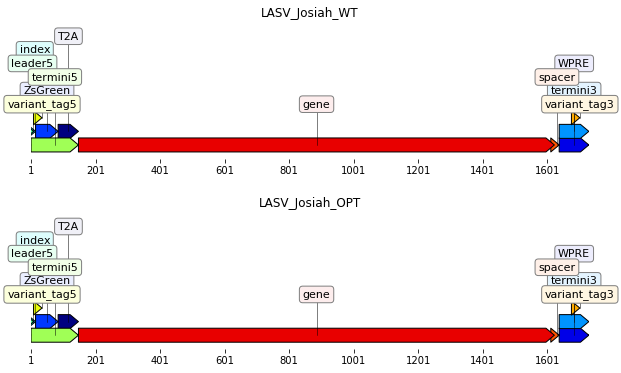

In [10]:
_ = lasv_targets.plot(ax_width=10)

We can write them to a file for alignment:

In [11]:
with tempfile.NamedTemporaryFile(mode="w") as f:
    lasv_targets.write_fasta(f.name)
    f.flush()
    fasta_text = open(f.name).read()
print(fasta_text)

>LASV_Josiah_WT
GACTGATANNNNNNCAGCGACGCCAAGAACCAGYAGTGGCACCTGACCGAGCACGCCATCGCCTCCGGCTCCGCCTTGCCCGCTGGATCCGGCGAGGGCAGAGGAAGTCTGCTAACATGCGGTGACGTCGAGGAGAATCCTGGCCCAATGGGACAAATAGTGACATTCTTCCAGGAAGTGCCTCATGTAATAGAAGAGGTGATGAACATTGTTCTCATTGCACTGTCTGTACTAGCAGTGCTGAAAGGTCTGTACAATTTTGCAACGTGTGGCCTTGTTGGTTTGGTCACTTTCCTCCTGTTGTGTGGTAGGTCTTGCACAACCAGTCTTTATAAAGGGGTTTATGAGCTTCAGACTCTGGAACTAAACATGGAGACACTCAATATGACCATGCCTCTCTCCTGCACAAAGAACAACAGTCATCATTATATAATGGTGGGCAATGAGACAGGACTAGAACTGACCTTGACCAACACGAGCATTATTAATCACAAATTTTGCAATCTGTCTGATGCCCACAAAAAGAACCTCTATGACCACGCTCTTATGAGCATAATCTCAACTTTCCACTTGTCCATCCCCAACTTCAATCAGTATGAGGCAATGAGCTGCGATTTTAATGGGGGAAAGATTAGTGTGCAGTACAACCTGAGTCACAGCTATGCTGGGGATGCAGCCAACCATTGTGGTACTGTTGCAAATGGTGTGTTACAGACTTTTATGAGGATGGCTTGGGGTGGGAGCTACATTGCTCTTGACTCAGGCCGTGGCAACTGGGACTGTATTATGACTAGTTATCAATATCTGATAATCCAAAATACAACCTGGGAAGATCACTGCCAATTCTCGAGACCATCTCCCATCGGTTATCTCGGGCTCCTCTCACAAAGGACTAGAGATATTTATATTAGTAGAAGATTGCTAGGCACATTCACATGGACACTGTCAGATTCTGAAGGTAAAGACACACCAGGGGGATATTGT